# **Projeto de Computação Quântica**

## **Problema da Mochila (*The Knapsack Problem*)**


Alunos: Bernardo Cunha Capoferri; Lívia Sayuri Makuta.

Nesse projeto, será proposto um algoritmo quântico capaz de resolver o Problema da Mochila, que é um problema difícil de ser resolvido através da computação clássica. Mas antes de tratar da implementação dessa solução, primeiro será explicado o que é esse problema, o porquê ele é considerado um problema NP-Completo (problemas cujas soluções podem ser verificadas em tempo polinomial por uma Máquina de Turing não determinística), e a importância desse campo quântico na computação para resolver esse tipo de problemas.

## **Índice**:
* [1. Descrição do Problema da Mochila](#first-bullet)
* [2. Análise da Complexidade do Problema da Mochila](#second-bullet)
* [3. O Papel da Computação Quântica na Resolução do Problema da Mochila](#third-bullet)
* [4. Oráculo Proposto Inicialmente para o Problema da Mochila](#fourth-bullet)
* [5. Testes Feitos com a Solução Proposta](#fifth-bullet)
* [6. Segunda solução proposta: VQE (Variational Quantum Eigensolver)](#sixth-bullet)
* [7. Montagem do Circuito QAOA](#seventh-bullet)
* [8. Referências](#eighth-bullet)


### **1. Descrição do Problema da Mochila** <a class="anchor" id="first-bullet"></a>

O Problema da Mochila envolve uma mochila com um limite de peso ($W$) e uma coleção de ($n$) itens, representados como $(x_1, x_2, x_3, \ldots, x_n)$, cada um com um valor $(v_1, v_2, v_3, \ldots, v_n)$ e um peso $(w_1, w_2, w_3, \ldots, w_n)$. O objetivo do Problema da Mochila é encontrar a solução de otimização que maximize o valor total dos itens adicionados à mochila, sujeito à restrição de que a soma dos pesos dos itens não pode exceder o limite de peso ($W$).

A pergunta fundamental é: Qual é o valor máximo dos itens que podem ser adicionados à mochila sem ultrapassar o limite de peso ($W$)?

A imagem a seguir representa como este problema pode ser visualizado:

<div>
<img src="knapsack.png" width="350" />
</div>

Imagem retirada de: https://pt.wikipedia.org/wiki/Ficheiro:Knapsack.svg


E existem duas abordagens diferentes em relação a este problema, as quais serão descritas nos tópicos a seguir.

#### **1.1 Problema da Mochila com Limitação (Bounded Knapsack Problem)**

No caso do Problema da Mochila com Limitação, os itens estão sujeitos à condição:

$[ 0 \leq x_i \leq c, \ \forall\ i=1,2,..,n ]$

Nesse contexto, o valor ($c$) denota o número de cópias disponíveis de cada item. Isso significa que existe um limite específico para a quantidade de cada item que pode ser adicionado à mochila, de tal forma que não podem ser incluídos mais itens do que a quantidade máxima definida $(c$).

#### **1.2 Problema da Mochila Ilimitada (Unbounded Knapsack Problem)**

Por outro lado, no Problema da Mochila Ilimitada, os itens têm a seguinte forma:

$[ x_i \geq 0, \forall\ i=1,2,...,n $]

No caso da mochila ilimitada, não há limite na quantidade de itens disponíveis. Isso significa que é possível incluir uma quantidade ilimitada de qualquer item na mochila, desde que o peso total não exceda a capacidade máxima da mochila $(W$).

Neste projeto, será abordado o Problema da Mochila Ilimitada.

### **2. Análise da Complexidade do Problema da Mochila** <a class="anchor" id="second-bullet"></a>

O Problema da Mochila é um dos problemas mais estudados na teoria da complexidade computacional. Sua complexidade intrínseca se deve a vários fatores que o tornam um exemplo clássico de um problema NP-Completo. Neste tópico, será analisada a complexidade do Problema da Mochila e os motivos pelos quais ele é considerado NP-Completo.

#### **2.1 Natureza Exponencial das Possibilidades**

O cerne da complexidade do Problema da Mochila reside na natureza exponencial das possibilidades. Suponha-se que existe um conjunto de ($n$) itens, cada um com um valor e um peso. Para encontrar a combinação ótima de itens que maximize o valor total, é preciso considerar todas as ($2^n$) combinações possíveis. Isso ocorre porque, para cada item, temos duas opções: incluí-lo ou excluí-lo da mochila. Portanto, o número de combinações cresce exponencialmente com o número de itens, o que torna a busca por uma solução ótima uma tarefa exponencialmente complexa.

#### **2.2 Verificação de Solução**

Além da busca exponencial, verificar se uma solução proposta é realmente ótima também é uma tarefa desafiadora. Para verificar se uma determinada combinação de itens atende aos requisitos do Problema da Mochila (ou seja, não excede o limite de peso e maximiza o valor), é necessário calcular o peso total e o valor total. Essa verificação requer tempo linear em relação ao número de itens. Como existem ($2^n$) combinações possíveis, verificar todas essas combinações levaria tempo exponencial. Portanto, a verificação de soluções é uma parte essencialmente exponencial do problema.

#### **2.3 Reduções a Outros Problemas NP-Completos**

Por fim, o Problema da Mochila também pode ser reduzido a outros problemas conhecidos como NP-Completos, como o Problema do Conjunto de Cobertura e o Problema da Soma de Subconjunto. Isso significa que se encontrássemos uma maneira eficiente de resolver o Problema da Mochila, poderíamos aplicar essa solução a esses outros problemas com eficiência. No entanto, como esses problemas também são NP-Completos, a redução implica que o Problema da Mochila é igualmente difícil de resolver. 

#### **2.4 Complexidade de algumas soluções**

O Problema da Mochila é conhecido como um problema NP-Completo devido à sua característica exponencial quando se busca a solução exata. Para encontrar a solução ótima (ou seja, a solução exata) de forma determinística, seria necessário explorar todas as possíveis combinações de itens, o que resulta em um tempo de execução exponencial de $O(2^n)$, onde n é o número de itens na mochila. Isso significa que, para um problema de mochila com 10 itens, o algoritmo exaustivo precisaria testar 1.024 combinações de itens. Para um problema de mochila com 20 itens, seriam necessários 1.048.576 testes de combinações de itens, e assim por diante. Portanto, encontrar a solução exata se torna impraticável à medida que o número de itens aumenta.

No entanto, a introdução de uma máquina de Turing não determinística é uma abstração que permite explorar múltiplos ramos de decisão simultaneamente. Nesse contexto, a máquina de Turing não determinística pode tentar várias combinações de itens ao mesmo tempo, o que teoricamente leva a encontrar a solução ótima em tempo polinomial, por isso o Problema da Mochila é um problema NP-Completo.

Para problemas práticos, a solução se encontra no uso de algoritmos heurísticos e aproximados, que podem fornecer soluções em tempo polinomial. Embora essas soluções não garantam a solução ótima, elas geralmente encontram uma solução que está muito próxima da solução ótima em tempo razoável. Alguns dos algoritmos heurísticos mais comuns para resolver o Problema da Mochila incluem:

**Algoritmo de Branch and Bound:** Este algoritmo explora as soluções de maneira estruturada, reduzindo o espaço de busca por meio de limites superiores e inferiores. Isso permite um refinamento progressivo em direção à solução ótima. Para esse caso, a complexidade no pior cenário é de $O(2^n)$, pois precisaria gerar todos os estágios intermediários e todas as folhas.

**Algoritmo Guloso:** A abordagem gulosa seleciona itens um de cada vez, começando pelos de maior valor, até que a capacidade da mochila seja atingida. Embora simples, pode fornecer soluções razoáveis em tempo curto, com uma complexidade de $O(n \cdot \log n)$.

**Algoritmo de Programação Dinâmica:** Este método cria uma tabela que armazena o valor máximo que pode ser inserido na mochila para cada combinação de itens, guardando o resultado de sub-problemas para que não precisem ser calculados mais do que uma vez. A complexidade deste algoritmo é de $O(n \cdot W)$, onde $n$ é o número de elementos e $W$ é a capacidade da mochila.

Em resumo, a busca pela solução exata do Problema da Mochila em tempo polinomial é uma abstração teórica e normalmente não é realizada na prática. A solução prática para problemas de tamanho real envolve o uso de algoritmos heurísticos eficientes que fornecem soluções próximas à ótima em tempo polinomial, tornando o problema gerenciável e adequado para muitas aplicações do mundo real.



### **3. O Papel da Computação Quântica na Resolução do Problema da Mochila**  <a class="anchor" id="third-bullet"></a>

Assim, a computação quântica surge como uma área promissora na busca por soluções eficientes para problemas complexos, como o Problema da Mochila, podendo desempenhar um papel crucial na resolução deste problema intrinsecamente difícil.

Isso porque, uma das características fundamentais da computação quântica é a capacidade de trabalhar com superposições quânticas. Enquanto na computação clássica estamos limitados a considerar uma única combinação de itens de cada vez, a computação quântica nos permite explorar várias combinações simultaneamente. Isso significa que podemos avaliar múltiplas soluções potenciais de uma só vez, o que pode levar a uma busca mais eficiente por uma solução ótima.

Além disso, a computação quântica também oferece a possibilidade de criar oráculos quânticos eficientes para verificar se uma solução proposta atende aos requisitos de um problema de alta complexidade. Enquanto na computação clássica a verificação de soluções pode ser uma tarefa demorada, os algoritmos quânticos podem realizar essa verificação de forma mais rápida e eficiente, tornando todo o processo de resolução mais ágil.

É por isso que já existem vários algoritmos quânticos que foram desenvolvidos especificamente para abordar problemas de otimização. Um exemplo notável é o algoritmo de Grover, que pode ser aplicado para realizar buscas eficientes no espaço de solução. Ao amplificar a amplitude das soluções desejadas, o algoritmo de Grover pode ajudar a encontrar a combinação ótima de itens de maneira mais rápida do que os métodos clássicos.

No entanto, é importante notar que a computação quântica ainda está em estágios iniciais de desenvolvimento. Os computadores quânticos atuais têm limitações em termos de número de qubits, temperatura para manter o computador, erros quânticos, entre outras, que afetam a escalabilidade.


### **4. Oráculo Proposto Inicialmente para o Problema da Mochila** <a class="anchor" id="fourth-bullet"></a>


#### **4.1 Descrição da Solução Proposta**

Como mencionado anteriormente, o Problema da Mochila é um desafio de otimização combinatória no qual, de um conjunto de itens disponíveis, é necessário selecionar um subconjunto desses itens para ser colocado em uma mochila com capacidade limitada. O objetivo é maximizar o valor total dos itens dentro da mochila, respeitando a restrição de peso.

Para ilustrar esse problema, consideremos os seguintes valores de exemplo:

- Valores dos itens: [10, 13, 18, 31, 7]
- Pesos dos itens: [2, 4, 6, 7, 3]
- Capacidade máxima da mochila: 10

A solução ótima neste cenário seria adicionar o primeiro e o quarto itens à mochila, o que resultaria em um valor total de 41 e um peso total de 9.

Antes de construir o oráculo, é essencial compreender o conceito de oráculo na computação quântica e como ele se aplica a esse problema em particular. Na computação quântica, um "oráculo" é uma abstração que se refere a uma caixa preta capaz de resolver um subproblema específico que faz parte de um problema maior.

Nesse contexto, a transformação do Problema da Mochila em um problema de otimização quadrática é um passo fundamental. Essa transformação envolve representar o problema em termos de funções quadráticas, que são mais facilmente manipuladas por algoritmos quânticos.

A escolha de transformar o problema em uma forma quadrática é estratégica, uma vez que o objetivo final é encontrar a combinação ideal de itens que maximize o valor total. Essa otimização pode ser expressa como uma função quadrática, na qual se busca maximizar ou minimizar uma função objetiva, sujeita a restrições quadráticas. Nesse caso, a função objetivo seria uma soma ponderada dos valores dos itens (o que se deseja maximizar), enquanto as restrições asseguram que o peso total não exceda o limite estabelecido.

Feito isso, o próximo passo para resolver um problema de otimização quadrática em um computador quântico, é utilizar algoritmos quânticos, como o QAOA (Quantum Approximate Optimization Algorithm), que são projetados especificamente para otimizar funções quadráticas. Nesse contexto, o oráculo representa a formulação do Problema da Mochila na forma de uma função quadrática e o algoritmo quântico opera com essa função quadrática como uma ferramenta para encontrar a solução que otimiza a função objetivo.

Assim, esse algoritmo quântico consulta essa função quadrática para determinar como ajustar as variáveis de decisão (por exemplo, quais itens incluir na mochila) de modo a maximizar o valor total.


#### **4.2 Implementação do Oráculo: Transformar em um Problema de Otimização Quadrático**


In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_optimization.applications import Knapsack
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver, QAOA
from qiskit.providers.ibmq import least_busy
from docplex.mp.model import Model
from qiskit_optimization.translators import from_docplex_mp
import numpy as np

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [13]:
def knapsack_quadratic_program(values, weights, max_weight):
    # Instância de Model do Docplex para definição do problema
    mod = Model(name="Knapsack")

    num_items = len(values)

    # Criação de variáveis binárias para representar a escolha de cada item
    x = []
    for i in range(num_items):
        x_i = mod.binary_var(name=f"x_{i}")
        #print(x_i)
        x.append(x_i)

    # Definição da função objetivo
    mod.maximize(mod.sum(values[i] * x[i] for i in range(num_items)))

    # Adição da restrição de que o peso total não pode exceder a capacidade máxima
    mod.add(mod.sum(weights[i] * x[i] for i in range(num_items)) <= max_weight)

    op = from_docplex_mp(mod)

    return op

def interpret(result):
    result_dic = result.variables_dict
    result_list = []
    index = 0
    for value in result_dic.values():
        if value == 1:
            result_list.append(index)
        index += 1
    return result_list

# Dados do problema da mochila
values = [10, 13, 18, 31, 7]
weights = [2, 4, 6, 7, 3]
max_weight = 10

qp = knapsack_quadratic_program(values, weights, max_weight)
print(qp)


maximize 10*x_0 + 13*x_1 + 18*x_2 + 31*x_3 + 7*x_4 (5 variables, 1 constraints, 'Knapsack')


A seguir será explicada a lógica da construção de código da função `knapsack_quadratic_program`:

1. **Criando um modelo**:
   Primeiro foi utilizada a classe `Model` da biblioteca Docplex para criar uma instância de um modelo de programação matemática. Sendo o Docplex um framework para a modelagem e resolução de problemas de otimização.

2. **Definição dos Dados**:
   Depois, o número de itens no problema foi determinado com base no comprimento da lista `values` (que possui o mesmo tamanho que a lista `weights`). Isso é importante para controlar o número de variáveis binárias que serão criadas.

3. **Criação de Variáveis Binárias**:
   Com o número de dados definidos: 
   - Foi criada uma lista vazia chamada `x` para armazenar as variáveis binárias.
   - Por meio de um loop, foi criada uma variável binária `x_i` para cada item. O nome da variável é definido como "x_i", onde "i" é o índice do item.
   - Por fim, cada variável binária foi adicionada à lista `x`. Essas variáveis binárias representarão a escolha de cada item, ou seja, se o item i é escolhido (valor 1) ou não (valor 0).

   Assim, suponhamos que temos 3 itens (0, 1 e 3), então após esse passo, teríamos as variáveis binárias `x_0`, `x_1` e `x_2`.

4. **Definição da Função Objetivo**:
   Para definir a função objetivo do problema, foi usado o `mod.maximize()` . Sendo assim, a função objetivo irá maximizar o valor total dos itens escolhidos na mochila. Para isso, somamos os produtos de `values[i]` (valor do item) e `x[i]` (variável binária correspondente) para todos os itens.


5. **Adição de Restrições**:
   Além disso, uma restrição foi adicionada para garantir que o peso total dos itens escolhidos não exceda a capacidade máxima da mochila (`max_weight`). A restrição é uma soma dos produtos dos pesos dos itens e das variáveis binárias correspondentes. Ela é adicionada ao modelo com `mod.add()`.


6. **Conversão para QuadraticProgram**:
   Por fim, o modelo criado no Docplex é convertido para um objeto `QuadraticProgram` usando a função `from_docplex_mp`. Isso permite que sejam usadas as funcionalidades do Qiskit para resolver o problema de otimização quadrática.

O objeto `QuadraticProgram`, que representa o problema de otimização quadrática, contém todas as informações necessárias, incluindo variáveis, função objetivo e restrições. Uma vez que ele é criado, pode então ser retornado pela função `knapsack_quadratic_program`



Como foi explicado anteriormente, a função `knapsack_quadratic_program` apenas monta a função quadrática do Problema da Mochila, tendo como base seus itens, seus pesos e valores e a restrição de capacidade de peso da mochila.  Uma vez que essa função é montada, ela deve ser então aplicada em um algoritmo de otimização que retornará o resultado que possui as variáveis binárias que representam quais itens da mochila foram selecionados (aqueles que possuem valor como 1). Assim, a função `interpret` foi criada para interpretar esse resultado e saber qual o valor foi atingido com os itens selecionados para a mochila. Abaixo sua lógica será explicada detalhadamente:

1. **Processamento do Resultado da Otimização**:
   O objetivo da função `interpret` é processar o resultado da otimização, que é um conjunto de variáveis binárias com valores 0 ou 1, indicando quais itens foram escolhidos e quais não foram.

2. **Variáveis de Saída**:
   - `result_dic`: A função recebe o resultado da otimização como entrada, que é uma estrutura de dados (dicionário) onde as chaves são os nomes das variáveis e os valores são os valores atribuídos a essas variáveis na solução da otimização.

   - `result_list`: Esta é a lista que a função vai retornar, contendo os índices dos itens que foram escolhidos (ou seja, aqueles com valor 1 nas variáveis binárias).

3. **Processamento do Resultado**:
   A função `interpret` realiza o seguinte processamento:
   - Ela inicia uma variável `index` como 0, que será usada para acompanhar o índice dos itens.
   - Em seguida, itera através do dicionário `result_dic`. Para cada valor (0 ou 1) no dicionário:
     - Se o valor for igual a 1, isso significa que o item correspondente foi escolhido. Nesse caso, o índice do item (representado por `index`) é adicionado à lista `result_list`.
     - O índice é então incrementado para que possamos continuar rastreando os índices dos itens.

4. **Retorno da Lista de Itens Escolhidos**:
   Após o processamento, a função retorna a lista `result_list`, que contém os índices dos itens que foram escolhidos na solução da otimização. Esses índices podem ser usados para identificar quais itens estão na mochila com base nos dados originais.

Dessa forma, a função `interpret` permite extrair os itens escolhidos da solução da otimização e fornece uma representação mais compreensível do resultado para o usuário.

#### **4.3 Implementação do Algoritmo de Otimização: QAOA + COBYLA**

Como mencionado anteriormente, a busca por soluções ótimas para problemas NP-Completo é uma tarefa desafiadora. Uma abordagem para lidar com tais problemas é o uso de algoritmos de aproximação, que buscam encontrar soluções que se aproximem do ótimo, ainda que não sejam necessariamente as soluções ideais. No contexto dessa busca por soluções de qualidade, surgiram os algoritmos de aproximação quântica, conhecidos como QAA (Quantum Approximation Algorithms). Esses algoritmos têm como foco a utilização dos recursos quânticos para obter soluções de alta qualidade, em vez de simplesmente acelerar o tempo de execução, superando, assim, as limitações associadas aos ganhos de velocidade na computação quântica.

E como qualquer algoritmo quântico, parte-se de uma sequência de $n$ qubits que serão manipulados com portas quânticas para depois obter o estado final que será medido. Esse raciocínio pode ser representado melhor na imagem abaixo:

<div>
<img src="quantum_algorithms.png" width="550"/>
</div>

Imagem retirada de: https://www.osti.gov/servlets/purl/1526360.


Um dos algoritmos mais conhecidos nesse campo de otimização quântica é o QAOA (Quantum Approximate Optimization Algorithm), sendo conhecido por encontrar soluções aproximadas para problemas de otimização combinatorial, como é o caso do Problema da Mochila. Os passos desse algoritmo, de maneira simplicada, podem ser explicados da seguinte maneira:

O algoritmo Quantum Approximate Optimization Algorithm (QAOA) é uma técnica que utiliza a computação quântica para resolver problemas de otimização. Aqui estão os passos simplificados desse algoritmo:

1. **Definir Hamiltoniano de Custo (HC)**: O primeiro passo é criar um Hamiltoniano (um conceito da física quântica) que representa o problema de otimização. Este Hamiltoniano é chamado de Hamiltoniano de Custo (HC) e é projetado de modo que seu estado fundamental (estado de menor energia) represente a solução ideal do problema.

2. **Definir Hamiltoniano de Mistura (HM)**: Outro Hamiltoniano, chamado Hamiltoniano de Mistura (HM), é criado. Ele serve para "misturar" os estados quânticos, tornando-os mais exploratórios.

3. **Construir Camadas de Circuito**: São construídas camadas de circuito quântico. Uma camada é composta por duas partes: a primeira aplica uma operação relacionada ao HC com um ângulo chamado $γ$, e a segunda aplica uma operação relacionada ao HM com um ângulo chamado $α$. Essas camadas são repetidas várias vezes.

4. **Preparar um Estado Inicial**: Começa-se com um estado inicial e aplica-se repetidamente as camadas de HC e HM.

5. **Otimizar Parâmetros**: Usam-se técnicas clássicas para encontrar os melhores ângulos $γ$ e $α$ que minimizam a energia do sistema, ou seja, levam ao estado de menor energia, que é a solução.

6. **Realizar Medidas**: Por fim, realizam-se medidas no estado final do circuito otimizado. As informações obtidas a partir dessas medidas dão uma solução aproximada para o problema de otimização.

Em resumo, o QAOA começa com a definição de Hamiltonianos que representam o problema, constrói camadas de circuito usando esses Hamiltonianos, otimiza os ângulos dessas camadas para encontrar uma solução de baixa energia e, por fim, faz medições para obter uma solução aproximada para o problema de otimização. Esse circuito que possui essas camadas de Hamiltonianos pode ser descrito matematicamente da seguinte forma:

<div>
<img src="circuit_qaoa.png" width="400"/>
</div>

Imagem retirada de: https://pennylane.ai/qml/demos/tutorial_qaoa_intro.


Mas para conectar o Problema da Mochila ao QAOA, será utilizada a classe do Qiskit chamada `MinimumEigenOptimizer`, que atua como uma interface entre o problema de otimização e os algoritmos de otimização quântica. A função principal do `MinimumEigenOptimizer` é permitir que seja inserido um solucionador quântico capaz de encontrar o mínimo da função de energia (ou Hamiltoniana) associada ao problema.

Para o QAOA, essa função de energia é usada para representar a função objetivo do Problema da Mochila, ou seja, o valor total dos itens selecionados. Ela é expressa na forma de uma matriz associada ao problema, que é criada com base na formulação quadrática do problema. Em outras palavras, o `MinimumEigenOptimizer` traduz o Problema da Mochila em uma representação matricial compatível com o QAOA.

O QAOA, por sua vez, é utilizado como o resolvedor da otimização. Sua função é encontrar uma solução aproximada para o problema, maximizando o valor total dos itens dentro das restrições de peso.

Além disso, para aperfeiçoar o desempenho do QAOA na resolução do Problema da Mochila, foi empregado o otimizador COBYLA. Este otimizador clássico é utilizado para ajustar os parâmetros do QAOA. No contexto do QAOA, os parâmetros, denotados como $γ$ e $α$, são essenciais para determinar como as operações quânticas de camada (HC e HM) afetam a solução do problema. Esses parâmetros precisam ser otimizados para encontrar a melhor solução aproximada, ou seja, a combinação ideal de itens a serem colocados na mochila.

O COBYLA é uma escolha comum para otimização de parâmetros em algoritmos de otimização quântica, pois é especialmente adequado para problemas de otimização não linear e aqueles com restrições, como é o caso do Problema da Mochila, onde o peso total não deve exceder a capacidade máxima da mochila. Assim, o otimizador COBYLA ajusta os valores de $γ$ e $α$ de forma iterativa, buscando encontrar a melhor solução ou uma aproximação aceitável que maximize o valor total dos itens selecionados.




O código que implementa essa solução pode ser visto abaixo:

In [3]:
# QAOA
from qiskit.primitives import Sampler
from qiskit_aer.primitives import Sampler as AerSampler
from qiskit.algorithms.optimizers import COBYLA

seed = 123
algorithm_globals.random_seed = seed
sampler = Sampler()
aer_sampler = AerSampler(run_options={"shots": 1000, "seed": seed})

optimizer = COBYLA()
qaoa = QAOA(aer_sampler, optimizer, reps=2)
meo = MinimumEigenOptimizer(min_eigen_solver= qaoa)
result = meo.solve(qp)
                   
print('result:\n', result.prettyprint())
print(type(result))
print('\n index of the chosen items:', interpret(result)) 

result:
 objective function value: 41.0
variable values: x_0=1.0, x_1=0.0, x_2=0.0, x_3=1.0, x_4=0.0
status: SUCCESS
<class 'qiskit_optimization.algorithms.minimum_eigen_optimizer.MinimumEigenOptimizationResult'>

 index of the chosen items: [0, 3]


A seguir será explicada a lógica da implementação do QAOA:

1. **Configuração dos Parâmetros**:
   -  Uma semente é definida para a geração de números aleatórios. Isso garante que os resultados sejam reproduzíveis.

2. **Configuração do Sampler Quântico**:
   - Um sampler quântico é criado, sendo responsável por simular a execução de circuitos quânticos em um simulador quântico.
   - Ele é configurado para executar os circuitos quânticos com 1000 *shots* e usar a semente de números aleatórios definida anteriormente.

3. **Configuração do Otimizador Clássico COBYLA**:
   - O otimizador clássico COBYLA é definido, para depois ser usado a fim de ajustar os parâmetros do algoritmo QAOA. 

4. **Configuração do Algoritmo QAOA**:
   - O algoritmo QAOA é configurado com as seguintes opções:
     - `aer_sampler`: O sampler quântico que será usado para executar os circuitos quânticos do QAOA.
     - `optimizer`: O otimizador clássico COBYLA, que será usado para ajustar os parâmetros do QAOA.
     - `reps=2`: Define o número de repetições (ou camadas) do QAOA. O valor 2 indica que o algoritmo terá duas camadas.

5. **Configuração do MinimumEigenOptimizer (meo)**:
   - O MinimumEigenOptimizer é configurado tendo o QAOA como o resolvedor da otimização, permitindo encontrar uma solução aproximada para o Problema da Mochila usando um algoritmo quântico.

6. **Resolução do Problema**:
   - Por fim, o problema de otimização quadrática (representado pelo objeto `qp`) é resolvido utilizando o MinimumEigenOptimizer e, por sua vez, o QAOA e o COBYLA.

E, como visto na implementação, para o problema definido com os seguintes parâmetros:

- Valores dos itens: [10, 13, 18, 31, 7]
- Pesos dos itens: [2, 4, 6, 7, 3]
- Capacidade máxima da mochila: 10

A solução encontrada retorna um valor de 41, incluindo na mochila os itens de índice 0 e 3, conforme esperado.

### **5. Testes Feitos com a Solução Proposta** <a class="anchor" id="fifth-bullet"></a>

Para testar essa solução, foram feitos alguns testes, descritos a seguir:


1. **Testar com Dados Adicionais**:

Foram realizadas modificações nos valores e pesos dos itens, juntamente com ajustes na capacidade máxima da mochila.
O código foi então executado com esses novos conjuntos de dados, e as soluções obtidas foram avaliadas quanto à adequação em cada caso. No caso, todos os resultados obtidos foram coerentes com as entradas propostas.

In [4]:
# QAOA
from qiskit.primitives import Sampler
from qiskit_aer.primitives import Sampler as AerSampler
from qiskit.algorithms.optimizers import COBYLA

def knapsack_solver(values, weights, max_weight):
    new_qp = knapsack_quadratic_program(values, weights, max_weight)
    seed = 123
    algorithm_globals.random_seed = seed
    sampler = Sampler()
    aer_sampler = AerSampler(run_options={"shots": 1000, "seed": seed})

    optimizer = COBYLA()
    qaoa = QAOA(aer_sampler, optimizer, reps=2)
    meo = MinimumEigenOptimizer(min_eigen_solver= qaoa)
    result = meo.solve(new_qp)

    print('result:\n', result.prettyprint())
    print(type(result))
    print('\n index of the chosen items:', interpret(result)) 

# Define os casos de entrada
test_cases = [
    ([10, 13, 18, 31, 7], [2, 4, 6, 7, 3], 10),  # Caso 1. 
    ([5, 12, 15, 7, 20], [2, 5, 8, 3, 10], 15),  # Caso 2. 
    ([8, 4, 5, 3, 12], [3, 2, 2, 1, 7], 10),  # Caso 3. 
    ([20, 10, 15, 18, 5], [7, 4, 6, 2, 3], 15),  # Caso 4. 
    ([12, 15, 20, 7, 5], [5, 6, 8, 3, 2], 18)  # Caso 5. 
]

# Executa os testes e verifica os resultados
for i, (values, weights, max_weight) in enumerate(test_cases, start=1):
    knapsack_solver(values, weights, max_weight)


result:
 objective function value: 41.0
variable values: x_0=1.0, x_1=0.0, x_2=0.0, x_3=1.0, x_4=0.0
status: SUCCESS
<class 'qiskit_optimization.algorithms.minimum_eigen_optimizer.MinimumEigenOptimizationResult'>

 index of the chosen items: [0, 3]
result:
 objective function value: 32.0
variable values: x_0=1.0, x_1=0.0, x_2=0.0, x_3=1.0, x_4=1.0
status: SUCCESS
<class 'qiskit_optimization.algorithms.minimum_eigen_optimizer.MinimumEigenOptimizationResult'>

 index of the chosen items: [0, 3, 4]
result:
 objective function value: 20.0
variable values: x_0=0.0, x_1=0.0, x_2=1.0, x_3=1.0, x_4=1.0
status: SUCCESS
<class 'qiskit_optimization.algorithms.minimum_eigen_optimizer.MinimumEigenOptimizationResult'>

 index of the chosen items: [2, 3, 4]
result:
 objective function value: 53.0
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=1.0, x_4=0.0
status: SUCCESS
<class 'qiskit_optimization.algorithms.minimum_eigen_optimizer.MinimumEigenOptimizationResult'>

 index of the chosen items: [0, 2

2. **Experimentar com Diferentes Valores de `reps`**:

No experimento, foi feita a alteração do valor do parâmetro `reps` no QAOA para diferentes números de etapas. Observou-se como a qualidade da solução e o tempo de execução variaram com os diferentes valores de `reps`.

In [5]:
# Teste com diferentes valores de `reps`
import time

reps_values = [1, 2, 3, 4]
for reps in reps_values:
    start_time = time.time()
    qaoa = QAOA(aer_sampler, optimizer, reps=reps)
    meo = MinimumEigenOptimizer(min_eigen_solver= qaoa)
    result = meo.solve(qp)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f'Resultados com reps={reps}:\n', result.prettyprint())
    print('\n index of the chosen items:', interpret(result))
    print('\n execution time (s):\n', execution_time)
    print('------------------------------------------------------------')

Resultados com reps=1:
 objective function value: 41.0
variable values: x_0=1.0, x_1=0.0, x_2=0.0, x_3=1.0, x_4=0.0
status: SUCCESS

 index of the chosen items: [0, 3]

 execution time (s):
 3.4236814975738525
------------------------------------------------------------
Resultados com reps=2:
 objective function value: 41.0
variable values: x_0=1.0, x_1=0.0, x_2=0.0, x_3=1.0, x_4=0.0
status: SUCCESS

 index of the chosen items: [0, 3]

 execution time (s):
 5.191759824752808
------------------------------------------------------------
Resultados com reps=3:
 objective function value: 41.0
variable values: x_0=1.0, x_1=0.0, x_2=0.0, x_3=1.0, x_4=0.0
status: SUCCESS

 index of the chosen items: [0, 3]

 execution time (s):
 8.379518747329712
------------------------------------------------------------
Resultados com reps=4:
 objective function value: 41.0
variable values: x_0=1.0, x_1=0.0, x_2=0.0, x_3=1.0, x_4=0.0
status: SUCCESS

 index of the chosen items: [0, 3]

 execution time (s):

3. **Testar com Diferentes Algoritmos de Otimização**:

Para testar com diferentes algoritmos de otimização, foi necessário utilizar diversas opções de otimizadores disponíveis no Qiskit, tais como o SLSQP, L-BFGS-B, entre outros. Os resultados foram comparados para avaliar o desempenho e as soluções geradas pelos diversos otimizadores.

Antes de apresentar a solução, primeiro serão descritos quais foram os otimizadores utilizados:

**1. COBYLA (Constrained Optimization BY Linear Approximations)**:

- Usa aproximações lineares para otimizar funções sem restrições.
- É adequado para problemas com funções objetivas não lineares e não diferenciáveis.

**2. L-BFGS-B (Limited-memory Broyden-Fletcher-Goldfarb-Shanno with Bounds):**

- Usa a técnica BFGS para otimização com restrições de limites.
- É eficaz para otimização de problemas com muitas variáveis.

**3. SLSQP (Sequential Least Squares Programming):**

- Realiza otimização de programação quadrática sequencialmente.
- Útil para problemas de otimização não lineares com restrições de igualdade e desigualdade.

**4. GradientDescent:**

- Utiliza o gradiente da função para encontrar o mínimo.
- É um método simples, percorrendo a função de acordo com a direção de maior inclinação.

**5. P_BFGS (Paralelized Limited-memory BFGS Optimizer):**

- Uma versão paralela do L_BFGS_B, compartilhando os mesmos parâmetros.
- A paralelização pode ajudar o otimizador a evitar ficar preso em ótimos locais.


In [11]:
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B, GradientDescent, P_BFGS, SLSQP
import time
import matplotlib.pyplot as plt

# Lista de otimizadores
optimizer_names = ['COBYLA', 'L-BFGS-B', 'SLSQP','GradientDescent']
optimizers = [COBYLA(), L_BFGS_B(), SLSQP(),GradientDescent()]

converge_counts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)

for i, optimizer in enumerate(optimizers):
    start_time = time.time()

    print("\rOptimizer: {}        ".format(type(optimizer).__name__), end="")
    algorithm_globals.random_seed = 50


    counts = []
    values = []

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)


    start_time = time.time()
    
    qaoa_optimizer = QAOA(aer_sampler, optimizer, reps=2, callback = store_intermediate_result)
    meo_optimizer = MinimumEigenOptimizer(min_eigen_solver=qaoa_optimizer)
    result = meo_optimizer.solve(qp)
    
    converge_counts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)
    
    end_time = time.time()
    execution_time = end_time - start_time
        
    print('\n Result:\n', result.prettyprint())
    print('\n Index of the chosen items:', interpret(result)) 
    print('\n Execution time: ', execution_time)
    print('------------------------------------------------\n')
    

print("\rOptimization complete      ");


Optimizer: COBYLA        
 Result:
 objective function value: 41.0
variable values: x_0=1.0, x_1=0.0, x_2=0.0, x_3=1.0, x_4=0.0
status: SUCCESS

 Index of the chosen items: [0, 3]

 Execution time:  1.6441943645477295
------------------------------------------------

Optimizer: L_BFGS_B        
 Result:
 objective function value: 41.0
variable values: x_0=1.0, x_1=0.0, x_2=0.0, x_3=1.0, x_4=0.0
status: SUCCESS

 Index of the chosen items: [0, 3]

 Execution time:  3.3212811946868896
------------------------------------------------

Optimizer: SLSQP        
 Result:
 objective function value: 41.0
variable values: x_0=1.0, x_1=0.0, x_2=0.0, x_3=1.0, x_4=0.0
status: SUCCESS

 Index of the chosen items: [0, 3]

 Execution time:  2.9278972148895264
------------------------------------------------

Optimizer: GradientDescent        
 Result:
 objective function value: 41.0
variable values: x_0=1.0, x_1=0.0, x_2=0.0, x_3=1.0, x_4=0.0
status: SUCCESS

 Index of the chosen items: [0, 3]

 Exec

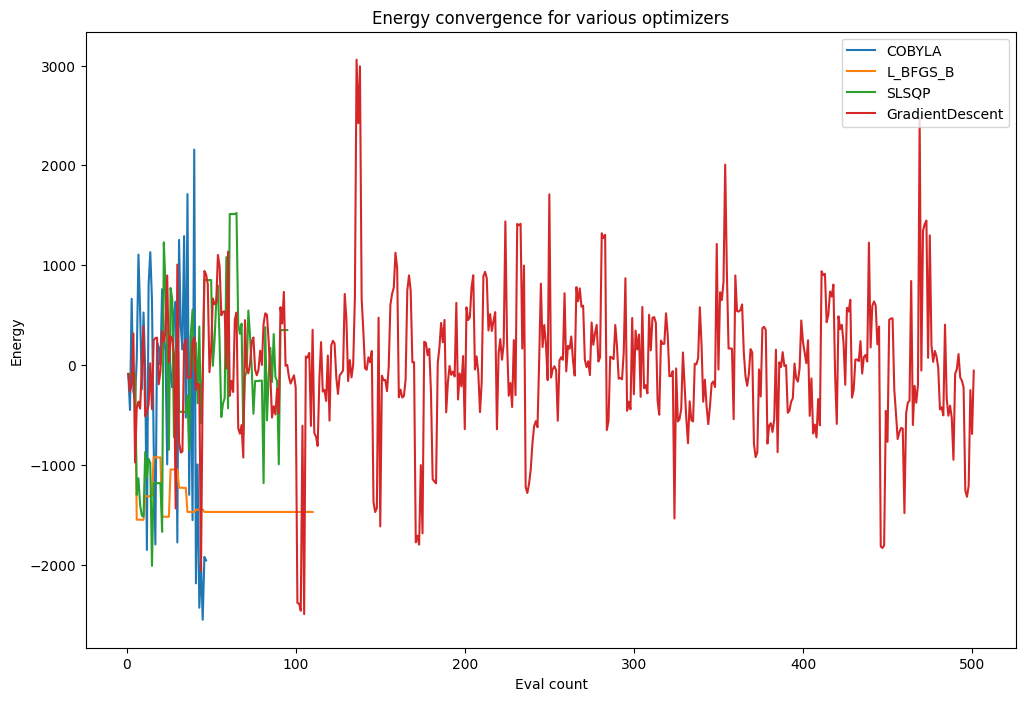

In [12]:
import pylab

pylab.rcParams["figure.figsize"] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various optimizers")
pylab.legend(loc="upper right");

Para o problema da mochila específico que está sendo otimizado, todos os otimizadores apresentaram os mesmos resultados, com um valor objetivo de 41.0 e a seleção dos mesmos itens [0, 3] como os mais indicados para a mochila.

No entanto, apesar dos resultados serem os mesmos, as diferenças entre os otimizadores estão no tempo de execução. Por exemplo, o "GradientDescent" teve um tempo de execução consideravelmente maior do que os outros otimizadores testados.

Portanto, a conclusão inicial seria que, para esse problema específico, todos os otimizadores obtêm os mesmos resultados, mas variam significativamente em termos de tempo de execução.

Geralmente, com o aumento do número de itens em um problema de otimização, a eficiência dos algoritmos pode variar. Alguns algoritmos são mais eficazes com um grande número de variáveis, enquanto outros podem sofrer para lidar com um aumento significativo na complexidade do problema.

O COBYLA e o SLSQP, por exemplo, tendem a ser menos afetados pelo aumento no número de variáveis, pois são adequados para problemas com funções objetivas não lineares e com restrições de igualdade e desigualdade, respectivamente.Por outro lado, algoritmos como o Gradient Descent e métodos de otimização baseados em gradiente podem enfrentar desafios com um grande número de variáveis, pois podem levar mais tempo para convergir ou podem ficar presos em ótimos locais.

No entanto, a escolha do melhor otimizador para um problema com um grande número de itens pode depender da natureza específica do problema, da esparsidade dos dados e da complexidade da função objetivo. 


4. **Comparação com Algoritmo Clássico:**

Neste exemplo, vamos comparar o desempenho do QAOA com um algoritmo de programação linear inteira (ILP) usando a biblioteca PuLP. Para isso, é necessário instalar a biblioteca PuLP primeiro:

```bash
pip install pulp
```

Aqui está o código para a comparação:

In [14]:
!pip install pulp

  Using cached PuLP-2.7.0-py3-none-any.whl (14.3 MB)

[notice] A new release of pip available: 23.1.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [15]:
import pulp as lp


num_items = len(values)
# Resolver com um algoritmo de programação linear inteira
ilp = lp.LpProblem("Knapsack ILP", lp.LpMaximize)

x = [lp.LpVariable(f"x_{i}", cat=lp.LpBinary) for i in range(num_items)]

# Função objetivo
ilp += lp.lpSum(values[i] * x[i] for i in range(num_items))

# Restrição de capacidade
ilp += lp.lpSum(weights[i] * x[i] for i in range(num_items)) <= max_weight

ilp.solve()

ilp_result = [x[i].varValue for i in range(num_items)]

print('Solução do ILP:', ilp_result)
print('Valor da Função Objetivo do ILP:', lp.value(ilp.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/fc3566805a1d4354b8cc88f4815c971e-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/fc3566805a1d4354b8cc88f4815c971e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 27 RHS
At line 29 BOUNDS
At line 35 ENDATA
Problem MODEL has 1 rows, 5 columns and 5 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 44.25 - 0.00 seconds
Cgl0004I processed model has 1 rows, 5 columns (5 integer (5 of which binary)) and 5 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 1 integers unsatisfied sum - 0.25
Cbc0038I Solution found of -41
Cbc0038I Before mini branch and bound, 4 integers at bound fixed and 0 continuous
Cbc0038I Full problem 1 rows 5 columns, reduced to 0 

/opt/conda/lib/python3.10/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


O método utilizado anteriormente, Programação Linear Inteira (ILP), é um método clássico de resolução de problemas de otimização. Essa abordagem emprega técnicas clássicas de resolução para encontrar a solução ótima para problemas utilizando a teoria de otimização e álgebra linear para encontrar as melhores combinações de variáveis sujeitas a restrições específicas. Ao contrário dos métodos quânticos, como o QAOA (Quantum Approximate Optimization Algorithm), o ILP não se baseia em princípios ou operações quânticas para realizar seus cálculos, ele opera de forma sequencial e determinística, considerando diferentes combinações de variáveis até encontrar a solução ótima.

### **6. Segunda solução proposta: VQE (Variational Quantum Eigensolver)** <a class="anchor" id="sixth-bullet"></a>


Para a solução anterior, quando o código foi modificado para utilizar um dispositivo quântico real disponível por meio do Qiskit, não foi possível executá-lo. Isso porque a biblioteca, o Qiskit Aqua, que anteriormente suportava a execução de algoritmos quânticos, como o Quantum Approximate Optimization Algorithm (QAOA), em dispositivos quânticos, foi deprecada. Assim, a IBM não oferece mais suporte a essa funcionalidade em versões mais recentes da biblioteca Qiskit Aqua. Em vez disso, eles recomendam o uso de bibliotecas e ferramentas mais especializadas para essa finalidade, como o Qiskit Runtime ou o IBM Quantum Composer.

Por isso, foi decidido explorar outros algoritmos para resolver esse problema de otimização, no caso o VQE. Importante ressaltar que esse algoritmo executa de maneira mais lenta em comparação ao QAOA, já que é um algoritmo de otimização que busca encontrar a energia mínima de um sistema quântico, enquanto o QAOA é um algoritmo de aproximação que se concentra na otimização de problemas de otimização combinatorial. O QAOA é mais eficiente para resolver problemas específicos de otimização, mas pode não ser tão preciso quanto o VQE em termos de encontrar a energia mínima exata do sistema.

O VQE funciona combinando um circuito quântico (ansatz) que depende de parâmetros variáveis com um otimizador clássico. Ele começa com um conjunto inicial de parâmetros, executa o circuito quântico para criar um estado quântico, mede a energia desse estado e, em seguida, ajusta os parâmetros de maneira a reduzir a energia medida. Esse processo é repetido iterativamente até que uma convergência seja alcançada, resultando em uma estimativa da energia mínima do sistema.

No contexto do problema da mochila, o VQE pode ser aplicado da seguinte maneira: em vez de estimar a energia mínima de um sistema quântico, o VQE é usado para otimizar uma solução para o problema da mochila.

Para isso, o "ansatz" quântico - que é uma suposição inicial sobre a forma da solução - é projetado de forma a representar possíveis configurações de itens que podem ser colocados na mochila, onde os parâmetros variáveis controlam quais itens são escolhidos. O circuito quântico é executado para gerar um estado quântico que codifica uma seleção de itens, e a medida do estado quântico fornece uma estimativa da utilidade total dessa seleção, enquanto as restrições de peso são mantidas.

O otimizador clássico é então usado para ajustar os parâmetros do "ansatz" de maneira a melhorar a utilidade da seleção. Esse processo é repetido iterativamente, procurando maximizar a utilidade total sujeita às restrições de peso da mochila. No final, o VQE fornece uma solução aproximada para o problema da mochila, encontrando a combinação de itens que maximiza a utilidade dentro das limitações de peso.

Abaixo, foi implementada uma solução com o VQE no AerSampler, que é uma parte do Qiskit responsável por executar simulações de circuitos quânticos usando o Aer backend, permitindo simular o comportamento de um circuito quântico em diferentes condições e configurações, como definir o número de "shots" (execuções) para obter estatísticas de resultados ou configurar o "seed" para ter reprodutibilidade nos resultados.


Importante ressaltar que foi realizada uma tentativa de execução de um circuito quântico na máquina quântica `ibm_nairobi`, porém, várias dificuldades foram identificadas durante o processo. Diversas abordagens alternativas foram exploradas, como a utilização do Sampler para o SamplingVQE, juntamente com a aplicação de um callback. No entanto, mesmo após essas tentativas, o código permaneceu em execução contínua, resultando em um loop indesejado. Detalhes sobre esses problemas podem ser encontrados na discussão presente neste issue: https://github.com/Qiskit/qiskit/issues/11207


In [5]:
!pip install qiskit-algorithms

  Using cached qiskit_algorithms-0.2.1-py3-none-any.whl (306 kB)

[notice] A new release of pip available: 23.1.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [6]:
#from qiskit.primitives import Sampler
import os
import time
from qiskit.primitives import Sampler
from qiskit_aer.primitives import Sampler as AerSampler
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B, SLSQP, GSLS, GradientDescent, P_BFGS, SLSQP
from qiskit.algorithms.minimum_eigensolvers import VQE, SamplingVQE
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Estimator
from qiskit_optimization.converters import QuadraticProgramToQubo

# Dados do problema da mochila
values = [10, 13, 18, 31, 7]
weights = [2, 4, 6, 7, 3]
max_weight = 10

qp = knapsack_quadratic_program(values, weights, max_weight)
print(qp)

seed = 123
algorithm_globals.random_seed = seed
                
num_qubits = 2
ansatz = TwoLocal(num_qubits, 'ry', 'cz')


sampler = Sampler()
aer_sampler = AerSampler(run_options={"shots": 1000, "seed": seed})


optimizers = [COBYLA(), L_BFGS_B(), SLSQP(),GradientDescent(),P_BFGS(),SLSQP()]
converge_counts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)

for i, optimizer in enumerate(optimizers):
    start_time = time.time()

    print("\rOptimizer: {}        ".format(type(optimizer).__name__), end="")
    algorithm_globals.random_seed = 50
    ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz")


    counts = []
    values = []

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe = SamplingVQE(sampler=sampler, ansatz=ansatz, optimizer=optimizer, callback=store_intermediate_result)
    #result = vqe.compute_minimum_eigenvalue(operator=op)
    meo = MinimumEigenOptimizer(min_eigen_solver=vqe)
    result = meo.solve(qp)
    converge_counts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)
    
    end_time = time.time()
    execution_time = end_time - start_time
    
    
    print('Result:\n', result.prettyprint())
    print('\n Index of the chosen items:', interpret(result)) 
    print('\n Execution time: ', execution_time)
    print('------------------------------------------------\n')
    

print("\rOptimization complete      ");

maximize 10*x_0 + 13*x_1 + 18*x_2 + 31*x_3 + 7*x_4 (5 variables, 1 constraints, 'Knapsack')
Optimizer: COBYLA        Result:
 objective function value: 28.0
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0
status: SUCCESS

 Index of the chosen items: [0, 2]

 Execution time:  199.7215232849121
------------------------------------------------

Optimizer: L_BFGS_B        Result:
 objective function value: 20.0
variable values: x_0=0.0, x_1=1.0, x_2=0.0, x_3=0.0, x_4=1.0
status: SUCCESS

 Index of the chosen items: [1, 4]

 Execution time:  748.469388961792
------------------------------------------------

Optimizer: SLSQP        Result:
 objective function value: 41.0
variable values: x_0=1.0, x_1=0.0, x_2=0.0, x_3=1.0, x_4=0.0
status: SUCCESS

 Index of the chosen items: [0, 3]

 Execution time:  570.7765648365021
------------------------------------------------

Optimizer: GradientDescent        Result:
 objective function value: 41.0
variable values: x_0=1.0, x_1=0.0, x_2=

/opt/conda/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


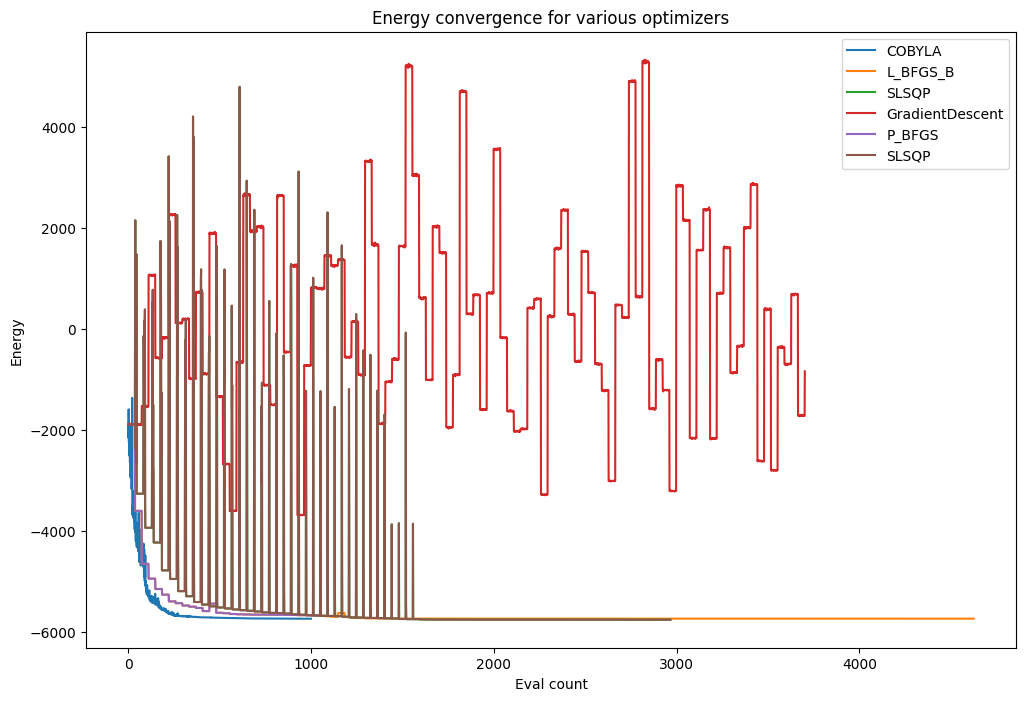

In [7]:
import pylab

pylab.rcParams["figure.figsize"] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various optimizers")
pylab.legend(loc="upper right");

O gráfico acima exibe a convergência da energia ao longo das iterações para os diferentes algoritmos de otimização. Ele destaca como a energia, ou o valor da função objetivo, varia à medida que o número de avaliações da função objetivo aumenta durante a otimização.

Os pontos de convergência de cada algoritmo são representados pelos locais onde a energia se estabiliza ou mostra uma diminuição significativa. Esses pontos indicam a convergência do algoritmo para uma solução, sugerindo que ele encontrou um mínimo local ou global para o problema de otimização.

Em comparação com o QAOA, o tempo de execução foi consideravelmente mais longo para cada um dos otimizadores, variando de algumas centenas de segundos a vários minutos. Além disso, cada otimizador convergiu para uma solução, mas com diferentes valores de função objetivo e conjuntos de itens escolhidos, destacando a sensibilidade do problema da mochila à abordagem do otimizador.

Isso sugere que, para o problema da mochila, o QAOA demonstrou uma convergência mais consistente e rápida para uma solução comum entre os diferentes otimizadores, enquanto o VQE mostrou variações significativas nos resultados, mesmo entre os mesmos otimizadores.

DAQUI PRA BAIXO NÃO TÁ DANDO CERTOOOOOOOOOOOOOOOOOOOOO:

In [4]:
from qiskit.quantum_info import SparsePauliOp

H2_op = SparsePauliOp.from_list(
    [
        ("II", -1.052373245772859),
        ("IZ", 0.39793742484318045),
        ("ZI", -0.39793742484318045),
        ("ZZ", -0.01128010425623538),
        ("XX", 0.18093119978423156),
    ]
)

In [10]:
!pip install -U qiskit_optimization


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 249.3 kB/s eta 0:00:0000:01
  Attempting uninstall: qiskit_optimization
    Found existing installation: qiskit-optimization 0.5.0
    Uninstalling qiskit-optimization-0.5.0:
      Successfully uninstalled qiskit-optimization-0.5.0

[notice] A new release of pip available: 23.1.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [22]:
from qiskit import IBMQ

# IBMQ.save_account(TOKEN)
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [41]:
#from qiskit.primitives import Sampler
import os
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, logging
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B, SLSQP
from qiskit_algorithms.minimum_eigensolvers import VQE, SamplingVQE
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Estimator
from qiskit_optimization.converters import QuadraticProgramToQubo
#import logging

# Configurando o nível de logging para suprimir os prints
#logging.basicConfig(level=logging.ERROR)
logging.getLogger().setLevel(logging.ERROR)
os.environ["QISKIT_IBM_RUNTIME_LOG_FILE"] = "log.txt"
os.environ["QISKIT_IBM_RUNTIME_LOG_LEVEL"] = "CRITICAL"

values = [13, 40, 18]
weights = [2, 4, 6]
max_weight = 10

qp = knapsack_quadratic_program(values, weights, max_weight)
print(qp)

converter = QuadraticProgramToQubo()
qp = converter.convert(qp)

seed = 123
algorithm_globals.random_seed = seed
service = QiskitRuntimeService(channel="ibm_quantum")
options = Options(resilience_level=1)

                
num_qubits = 2
ansatz = TwoLocal(num_qubits, 'ry', 'cz')


provider = IBMQ.get_provider(hub='ibm-q')
service = QiskitRuntimeService(channel="ibm_quantum")
options = Options(resilience_level=1)


backend = service.backend("ibmq_qasm_simulator")
#with Session(backend=backend) as session:

sampler = Sampler(backend=backend) 

optimizers = [COBYLA(maxiter=80), L_BFGS_B(maxiter=60), SLSQP(maxiter=60)]
converge_counts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)
#optimizer = COBYLA()


op, offset = qp.to_ising()

for i, optimizer in enumerate(optimizers):
    print("\rOptimizer: {}        ".format(type(optimizer).__name__), end="")
    algorithm_globals.random_seed = 50
    ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz")


    counts = []
    values = []

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    print("Vou chamar o sampling VQE")
    vqe = SamplingVQE(sampler=sampler, ansatz=ansatz, optimizer=optimizer, callback=store_intermediate_result)
    result = vqe.compute_minimum_eigenvalue(operator=op)
    print("Rodei o result!")
    print(counts)
    print(values)
    #meo = MinimumEigenOptimizer(min_eigen_solver=vqe)
    #result = meo.solve(qp)
    converge_counts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)
    #print('result:\n', result.prettyprint())
    #print(type(result))
    #print('\n index of the chosen items:', interpret(result)) 

print("\rOptimization complete      ");

maximize 13*x_0 + 40*x_1 + 18*x_2 (3 variables, 1 constraints, 'Knapsack')


base_primitive._run_primitive:INFO:2023-11-21 18:11:54,334: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 1}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


Optimizer: COBYLA        Vou chamar o sampling VQE


base_primitive._run_primitive:INFO:2023-11-21 18:11:56,222: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 1}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}
base_primitive._run_primitive:INFO:2023-11-21 18:11:57,826: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_trans

KeyboardInterrupt: 

In [ ]:
import pylab

pylab.rcParams["figure.figsize"] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various optimizers")
pylab.legend(loc="upper right");

In [ ]:
from qiskit_algorithms import NumPyMinimumEigensolver

numpy_solver = NumPyMinimumEigensolver()
result = numpy_solver.compute_minimum_eigenvalue(operator=H2_op)
ref_value = result.eigenvalue.real
print(f"Reference value: {ref_value:.5f}")

In [9]:
from qiskit import IBMQ

# IBMQ.save_account(TOKEN)
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [14]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit.algorithms.optimizers import COBYLA
from qiskit.algorithms.minimum_eigensolvers import VQE, SamplingVQE
from qiskit.algorithms import VQE
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Estimator
from qiskit_optimization.converters import QuadraticProgramToQubo

values = [13, 40, 18]
weights = [2, 4, 6]
max_weight = 10

qp = knapsack_quadratic_program(values, weights, max_weight)
print(qp)

converter = QuadraticProgramToQubo()
qp = converter.convert(qp)

seed = 123
algorithm_globals.random_seed = seed
service = QiskitRuntimeService(channel="ibm_quantum")
options = Options(resilience_level=1)

                
num_qubits = 2
ansatz = TwoLocal(num_qubits, 'ry', 'cz')


def roda(qp):
    op, offset = qp.to_ising()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = provider.get_backend('ibmq_qasm_simulator')
    optimizer = COBYLA(maxiter=200)
    vqe = VQE(ansatz=ansatz, optimizer=optimizer, quantum_instance=backend)
    result = vqe.compute_minimum_eigenvalue(operator=op)
    return result


result = roda(qp)
print('result:\n', result.prettyprint())
print(type(result))
print('\n index of the chosen items:', interpret(result)) 

#result = meo.solve(qp)
#vqe.compute_minimum_eigenvalue(operator=operator)

#print('result:\n', result.prettyprint())
#print(type(result))
#print('\n index of the chosen items:', interpret(result)) 

maximize 13*x_0 + 40*x_1 + 18*x_2 (3 variables, 1 constraints, 'Knapsack')


/tmp/ipykernel_143/403784570.py:34: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe = VQE(ansatz=ansatz, optimizer=optimizer, quantum_instance=backend)
capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.

KeyboardInterrupt



In [ ]:
print('result:\n', result.prettyprint())
print(type(result))
print('\n index of the chosen items:', interpret(result)) 

### **7. Montagem do Circuito QAOA** <a class="anchor" id="seventh-bullet"></a>


Apesar de ter sido tentada um outra solução quântica, no caso o VQE, também foi testada o QAOA só que de uma maneira mais manual, construindo de fato o circuito dele, que é um circuito quântico parametrizado chamado "ansatz" para criar uma suposição inicial sobre o estado quântico que pode representar uma solução do problema de otimização. O circuito QAOA, como descrito e visto anteriormente de maneira indireta, é composto por uma sequência de camadas, cada uma das quais consiste em rotações de qubit com portas específicas.

Sendo assim, o circuito que irá ser construído segue as seguintes etapas:

**1. Inicialização:** O circuito começa com uma série de portas de Hadamard aplicadas a cada qubit no estado |0⟩. Isso cria um superestado uniforme em que cada possível solução do problema de otimização tem uma amplitude inicial.

**2. Construção do Hamiltoniano:** Depois os termos do Hamiltoniano do sistema são calculados. Nesse caso, o Hamiltoniano é uma descrição da energia total do sistema e é fundamental para o QAOA. O Hamiltoniano inclui termos que representam a função de custo e a função de restrição do problema da mochila. Os valores dos termos são calculados com base nos custos e pesos dos itens.

**3. Construção das Camadas QAOA:** Em seguida, as camadas de mistura (mixer) e custo (cost) do QAOA são construídas. Para isso, são usadas portas paramétricas (P) para aplicar rotações com ângulos paramétricos aos qubits. As rotações são definidas com base nos valores dos termos do Hamiltoniano calculados anteriormente. As camadas de mistura são controladas pelo ângulo `gamma`, enquanto as camadas de custo são controladas pelo ângulo `beta`.

**4. Finalização do Circuito:** Uma porta Rx é aplicada no final para cada qubit, com ângulos 2 vezes `beta`. Isso conclui a construção do circuito QAOA e permite um ajuste fino da superposição de estados, o que pode ser crucial para obter soluções melhores.

**5. Número de Camadas:** Por fim, o número de camadas no circuito QAOA é um parâmetro ajustável. À medida que o número de camadas aumenta, o circuito pode representar soluções mais complexas do problema. No entanto, um número maior de camadas também aumenta a complexidade do cálculo e o esforço computacional.


Assim, esse algoritmo é executado iterativamente, ajustando os ângulos dos parâmetros a cada iteração. Durante o processo de otimização, o algoritmo busca os ângulos que minimizam a função de custo associada ao problema de otimização. À medida que o algoritmo converge, a solução aproximada para o problema é refinada. Porém,  no código construído a seguir, uma única camada de mistura e uma única camada de custo foram aplicadas.

In [17]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, BasicAer, Aer
from qiskit.tools import visualization
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
import matplotlib.pyplot as plt
from itertools import product, combinations

#knapsack problem
N = 3
C = 4
cost = [13, 40, 31]
weight = [2, 4, 6]
beta = 0.1 * np.pi
gamma = 0.1 * np.pi

#parameter
B=1
A = B*(max(cost)+100)

#function
def X(i):
    x = np.eye(1)
    for k in range(N):
        if k == i:
            x = np.kron(x, np.array([[0,1],[1,0]]))
        else:
            x = np.kron(x, np.eye(2))
    return x

def Z(i, coeff):
    z = np.eye(1)
    for k in range(N):
        if k == i:
            z = np.kron(z, np.array([[coeff,0],[0,-1*coeff]]))
        else:
            z = np.kron(z, np.eye(2))
    return z

def Unitary(A,k):
    vec = np.linalg.eig(A)[1]
    val = np.linalg.eig(A)[0]
    d_list = np.array([np.e**(ki1j) for i in val])
    diag = np.diag(d_list)
    a=np.dot(vec,diag)
    b=np.dot(a,np.linalg.inv(vec))
    return b

def Cost(x):
    return sum([int(x[i])*cost[N-1-i] for i in range(N)])

def Weight(x):
    return sum([int(x[i])*weight[N-1-i] for i in range(N)])

In [18]:
qr_N = QuantumRegister(N)
qr_C = QuantumRegister(C)
cr = ClassicalRegister(N)

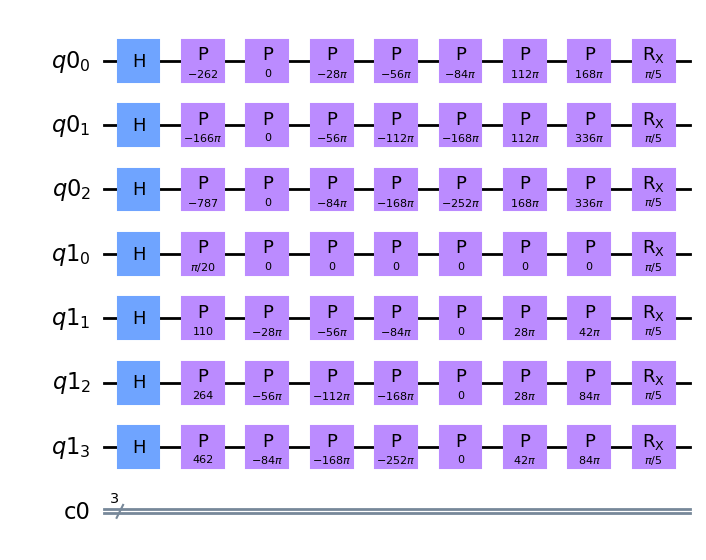

In [19]:
circuit = QuantumCircuit(qr_N,qr_C,cr,name="QAOA")

#initialization
for i in range(N+C):
    circuit.h(i)

#hamiltonian
term = dict()
term["null"] = 0
for i in range(N):
    term[qr_N[i]] = 0
    for n in range(C):
        term[qr_C[n]] = 0
for i in range(N):
    for n in range(C):
        term[qr_N[i], qr_C[n]] = 0
for i,j in combinations(list(range(N)),2):
    term[qr_N[i],qr_N[j]] = 0
for m,n in combinations(list(range(C)),2):
    term[qr_C[m],qr_C[n]] = 0

for i in range(N):
    term[qr_N[i]] += -1/2*(A*(weight[i]**2)-B*cost[i])
    term["null"] += 1/2*(A*(weight[i]**2)-B*cost[i])

for n in range(C):
    term[qr_C[n]] += -1/2*(A*(n*2)-1)
    term["null"] += 1/2*(A*(n*2)-1)

for (i,j) in combinations(list(range(N)),2):
    term["null"] += 2*A*weight[i]*weight[j]*1/4
    term[qr_N[i]] += 2*A*weight[i]*weight[j]*(-1/4)
    term[qr_N[j]] += 2*A*weight[i]*weight[j]*(-1/4)
    term[qr_N[i], qr_N[j]] += 2*A*weight[i]*weight[j]*(1/4)

for (m,n) in combinations(list(range(C)),2):
    term["null"] += 2*A*m*n*1/4
    term[qr_C[m]] += 2*A*m*n*(-1/4)
    term[qr_C[n]] += 2*A*m*n*(-1/4)
    term[qr_C[m], qr_C[n]] += 2*A*m*n*(1/4)

for i in range(N):
    for n in range(C):
        term["null"] += -2*A*weight[i]*n*1/4
        term[qr_N[i]] += -2*A*weight[i]*n*(-1/4)
        term[qr_C[n]] += -2*A*weight[i]*n*(-1/4)
        term[qr_N[i], qr_C[n]] += -2*A*weight[i]*n*(1/4)

for t in term:
    if type(t) == qiskit.circuit.quantumregister.Qubit:
        circuit.p(gamma*term[t],t)
    if type(t) == tuple:
        circuit.p(2*gamma*term[t],t[0])
        circuit.p(2*gamma*term[t],t[1])

for i in range(N):
    circuit.rx(2*beta, qr_N[i])

for n in range(C):
    circuit.rx(2*beta, qr_C[n])
    
circuit.draw("mpl")

In [20]:
backend = Aer.get_backend('statevector_simulator')
job = execute(circuit, backend)
result = job.result()
outputstate = result.get_statevector(circuit)
print("output")

output


optimal solution: 110
optimal cost: 71


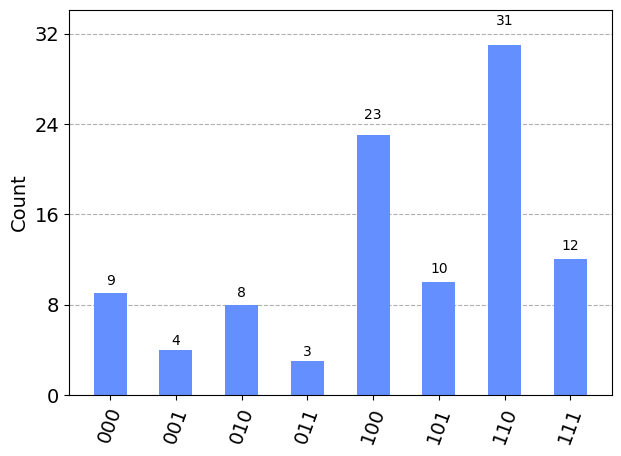

In [21]:
circuit.measure(qr_N,cr)
circuit.draw(output = 'mpl')
plt.show()
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend,shots = 100)
result = job.result()
counts = result.get_counts(circuit)

#Execute on quantum Device
#provider = IBMQ.get_provider()
#backends = provider.get_backend('ibmq_16_melbourne')
#job = execute(circuit, backend,shots = 100)
#result = job.result()
#counts = result.get_counts(circuit)
plot_histogram(counts)
plt.show()

opt_sol = ""
opt_obj = 0
for sol in counts:
    if counts[sol] >= 5:
        if (Cost(sol) > opt_obj) and (Weight(sol) <= 10):
            opt_sol = sol
            opt_obj = Cost(sol)

print("optimal solution:", opt_sol)
print("optimal cost:", opt_obj)
plot_histogram(counts)

In [22]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# Transpile your quantum circuit for the specific backend (if needed)
t_qc = transpile(circuit, backend, optimization_level=3)
job = backend.run(t_qc)

/tmp/ipykernel_60/676626800.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


least busy backend:  ibm_lagos


In [23]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


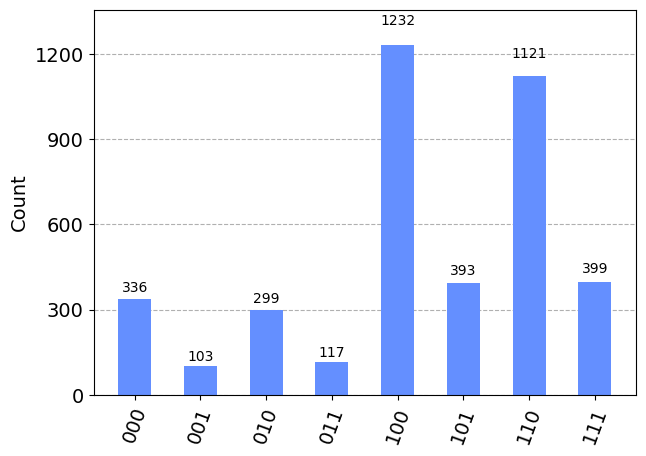

In [25]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(circuit))

Como pôde ser visto, a montagem manual do circuito QAOA e sua execução em uma máquina quântica (a `ibm_lagos`) foram feitas com sucesso e resultaram em uma solução viável para o problema de otimização da mochila proposto, escolhendo os dois itens de maior valor e dentro do limite de peso de 10kk. No entanto, é importante ressaltar que, devido à abordagem manual na construção do circuito, a solução pode ter variações.

O circuito QAOA foi parametrizado e construído em camadas de rotações quânticas, permitindo uma suposição inicial sobre o estado quântico que poderia representar uma solução para o problema de otimização. A montagem manual dessas camadas envolveu etapas como inicialização, construção do Hamiltoniano, construção das camadas QAOA e ajuste fino do circuito.

No código construído, foi aplicada uma única camada de mistura e uma única camada de custo. Geralmente, um número maior de camadas pode representar soluções mais complexas do problema, mas também aumenta a complexidade computacional.

Embora essa construção manual possa fornecer uma boa solução inicial, é essencial notar que a eficácia dessa abordagem pode variar dependendo da configuração específica do problema e da parametrização do circuito. A variação nos resultados pode surgir devido a diferentes ajustes de parâmetros ou a uma representação insuficiente da solução ótima. Assim, é fundamental estar ciente das limitações dessa abordagem manual e explorar técnicas adicionais - como foi feito anteriormente - para otimizar os resultados e a precisão da solução para o problema da mochila.

### **8. Referências** <a class="anchor" id="eighth-bullet"></a>

- CERONI, Jack. "Intro to QAOA". 2020. Disponível em: https://pennylane.ai/qml/demos/tutorial_qaoa_intro. Acesso em: 15 out. 2023.

- jsi1129. "qiskit-community: quantum-hackathon-korea-21". 2021. Disponível em: https://github.com/qiskit-community/quantum-hackathon-korea-21/issues/4. Acesso em: 24 nov. 2023.

- LUCAS, Andrew. "Ising formulations of many NP problems". 2014. Disponível em: https://arxiv.org/pdf/1302.5843.pdf. Acesso em 23 nov. 2023. 

- PAREKH, Ojas D. "Quantum Optimization Algorithms". 2018. Disponível em: https://www.osti.gov/servlets/purl/1526360. Acesso em: 15 out. 2023.

- QISKIT COMMUNITY. "qiskit-optimization". Disponível em: https://github.com/qiskit-community/qiskit-optimization/blob/d6cb5fcd5cbd1637a392b6184bf7fc8956b3a507/qiskit_optimization/applications/knapsack.py#L25 . Acesso em: 15 out. 2023.

- QISKIT. "QAOA". 2023. Disponível em: https://qiskit.org/ecosystem/algorithms/stubs/qiskit_algorithms.QAOA.html. Acesso em: 15 out. 2023.

- QISKIT. "Quadratic Programs". 2023. Disponível em: https://qiskit.org/ecosystem/optimization/tutorials/01_quadratic_program.html. Acesso em: 15 out. 2023.

- QISKIT. "Optimizers". 2023. Disponível em: https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.html. Acesso em: 15 out. 2023.

- QISKIT. "Issue mismatch between parameters trying to run minimum eigen optimizer on real quantum hardware". 2023. Disponível em: https://github.com/Qiskit/qiskit/issues/11207. Acesso em: 20 nov. 2023.

- SINGH, Bhavini. "Knapsack Problem: Different methods to solve the Knapsack Problem". 2021. Disponível em: https://medium.com/analytics-vidhya/knapsack-problem-7f05d0900db8#:~:text=Time%20Complexity%3A%20O%20(N*,the%20capacity%20of%20the%20knapsack. Acesso em: 22 out. 2023.



EOF